**본 코드는 Colab에서 작성되었으며, 코드 정리를 위해 Markdown을 베이스로 한 코랩 목차를 활용하였습니다.**

**Colab 환경에서의 목차 이동을 추천드립니다.**

---


# Google Colab with Google Drive


In [52]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


---


# PIP Install (UCI_Repo)


In [53]:
!pip install ucimlrepo
!pip install --upgrade scikit-learn

---


# Library Import


In [54]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')



---


# Random Seed fix

In [55]:
import random as python_random # 시드값 고정
seed_num = 42
np.random.seed(seed_num)
python_random.seed(seed_num)



---


# Version

In [56]:
import platform

# OS
platform.platform()

'Linux-5.15.120+-x86_64-with-glibc2.35'

In [57]:
# 런타임 유형 : CPU
print('런타임 유형 : CPU')
print()
!cat /proc/cpuinfo

런타임 유형 : CPU

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignme

In [58]:
import sys
import sklearn
import numpy
import pandas
import matplotlib

sys.version
print('-Google Colab-')
!cat /etc/issue.net
!python --version
print('Numpy ' + numpy.__version__)
print('Pandas ' + pandas.__version__)
print('Sklearn ' + sklearn.__version__)
print('Matplotlib ' + matplotlib.__version__)
print('Seaborn ' + sns.__version__)

-Google Colab-
Ubuntu 22.04.3 LTS
Python 3.10.12
Numpy 1.23.5
Pandas 1.5.3
Sklearn 1.3.2
Matplotlib 3.7.1
Seaborn 0.12.2


---


# Dataset Import (AutoMobile Dataset)


In [59]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

dataset = pd.DataFrame(X)
label = pd.DataFrame(y)
dataset = pd.concat([dataset,label],axis=1)
dataset.head(5) # price -> target Y로 설정

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


---


# Simple EDA

## Dtype

In [60]:
# info
display(dataset.info())
print()

# data type
print('DATA_TYPE\n')
print('dtype이 object인 column')
display(dataset.dtypes[dataset.dtypes == object])
print()
print('dtype이 int인 column')
display(dataset.dtypes[dataset.dtypes == int])
print()
print('dtype이 float인 column')
display(dataset.dtypes[dataset.dtypes == float])
print()

# describe
display(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

None


DATA_TYPE

dtype이 object인 column


fuel-system        object
engine-type        object
engine-location    object
drive-wheels       object
body-style         object
aspiration         object
fuel-type          object
make               object
dtype: object


dtype이 int인 column


highway-mpg         int64
city-mpg            int64
engine-size         int64
num-of-cylinders    int64
curb-weight         int64
symboling           int64
dtype: object


dtype이 float인 column


price                float64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
height               float64
width                float64
length               float64
wheel-base           float64
num-of-doors         float64
normalized-losses    float64
dtype: object

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


## Missingno

<Axes: >

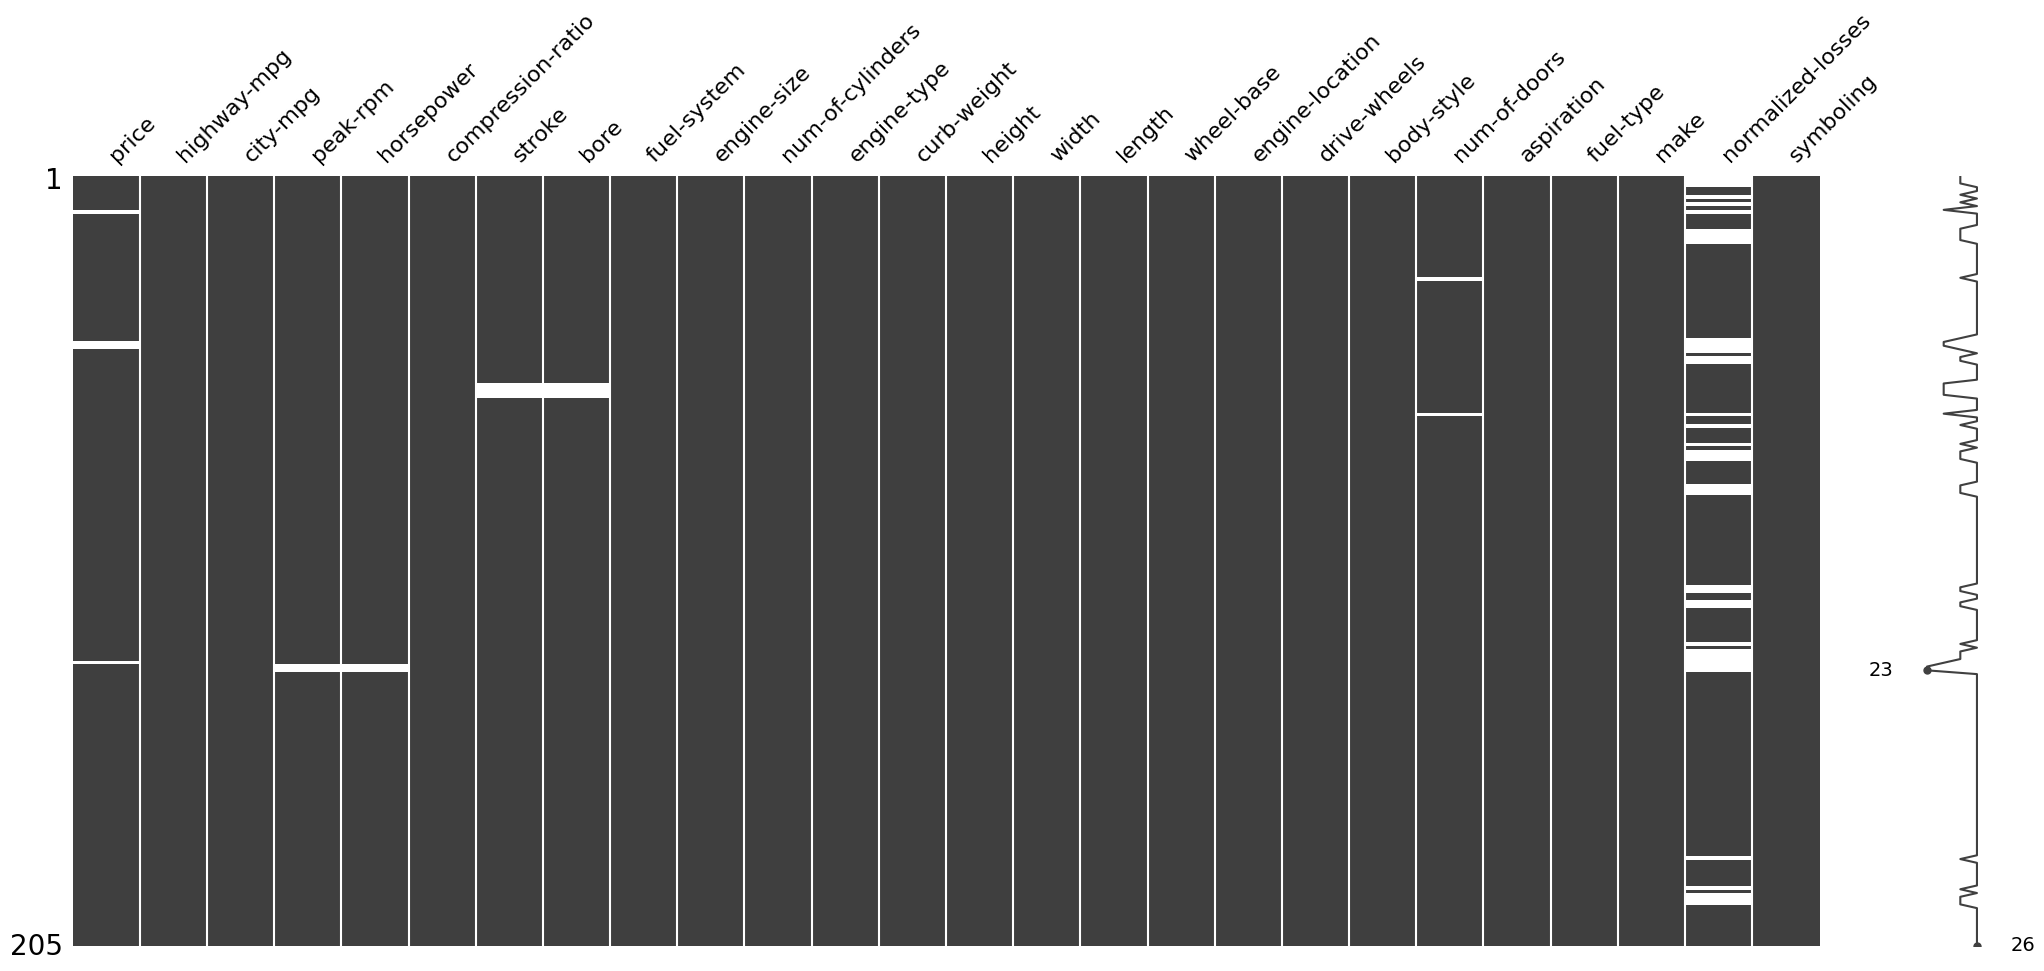

In [61]:
msno.matrix(dataset)

In [62]:
print('Dataset의 Row 수 : {}\n'.format(dataset.shape[0]))
print('결측치가 있는 Row 수 : {}\n'.format(dataset.shape[0] - dataset.dropna().shape[0]))

Dataset의 Row 수 : 205

결측치가 있는 Row 수 : 46



## Histogram

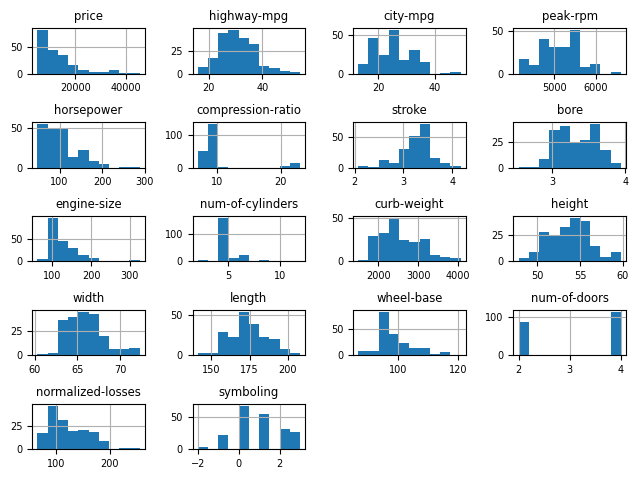

In [63]:
plt.rc('font', size=7)
dataset.iloc[:,:].hist()
plt.tight_layout()

## Categorical Column

In [64]:
cat_cols = []
for i in dataset.columns :
  if dataset[i].dtype == 'object' :
    cat_cols.append(i)

for i in cat_cols :
  print('{} : {}.  총 {}개\n'.format(i,dataset[i].unique(),dataset[i].nunique()))

fuel-system : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'].  총 8개

engine-type : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'].  총 7개

engine-location : ['front' 'rear'].  총 2개

drive-wheels : ['rwd' 'fwd' '4wd'].  총 3개

body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'].  총 5개

aspiration : ['std' 'turbo'].  총 2개

fuel-type : ['gas' 'diesel'].  총 2개

make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'].  총 22개



---


# Preprocessing

## Train / Test

In [65]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 나머지 세트로 분할 (85% / 15%)
train_set, test_set = train_test_split(dataset, test_size=0.15, random_state=42)
print('Trainset의 SIZE : {}\n'.format(train_set.shape[0]))
print('Testset의 SIZE : {}\n'.format(test_set.shape[0]))

Trainset의 SIZE : 174

Testset의 SIZE : 31



## Missing Value

전체 Dataset의 Row 수 : 205

Normalized-losses 중 결측치가 있는 Row 수 : 41

결측치 제거 후 Train data의 Row 수 : 171



<Axes: >

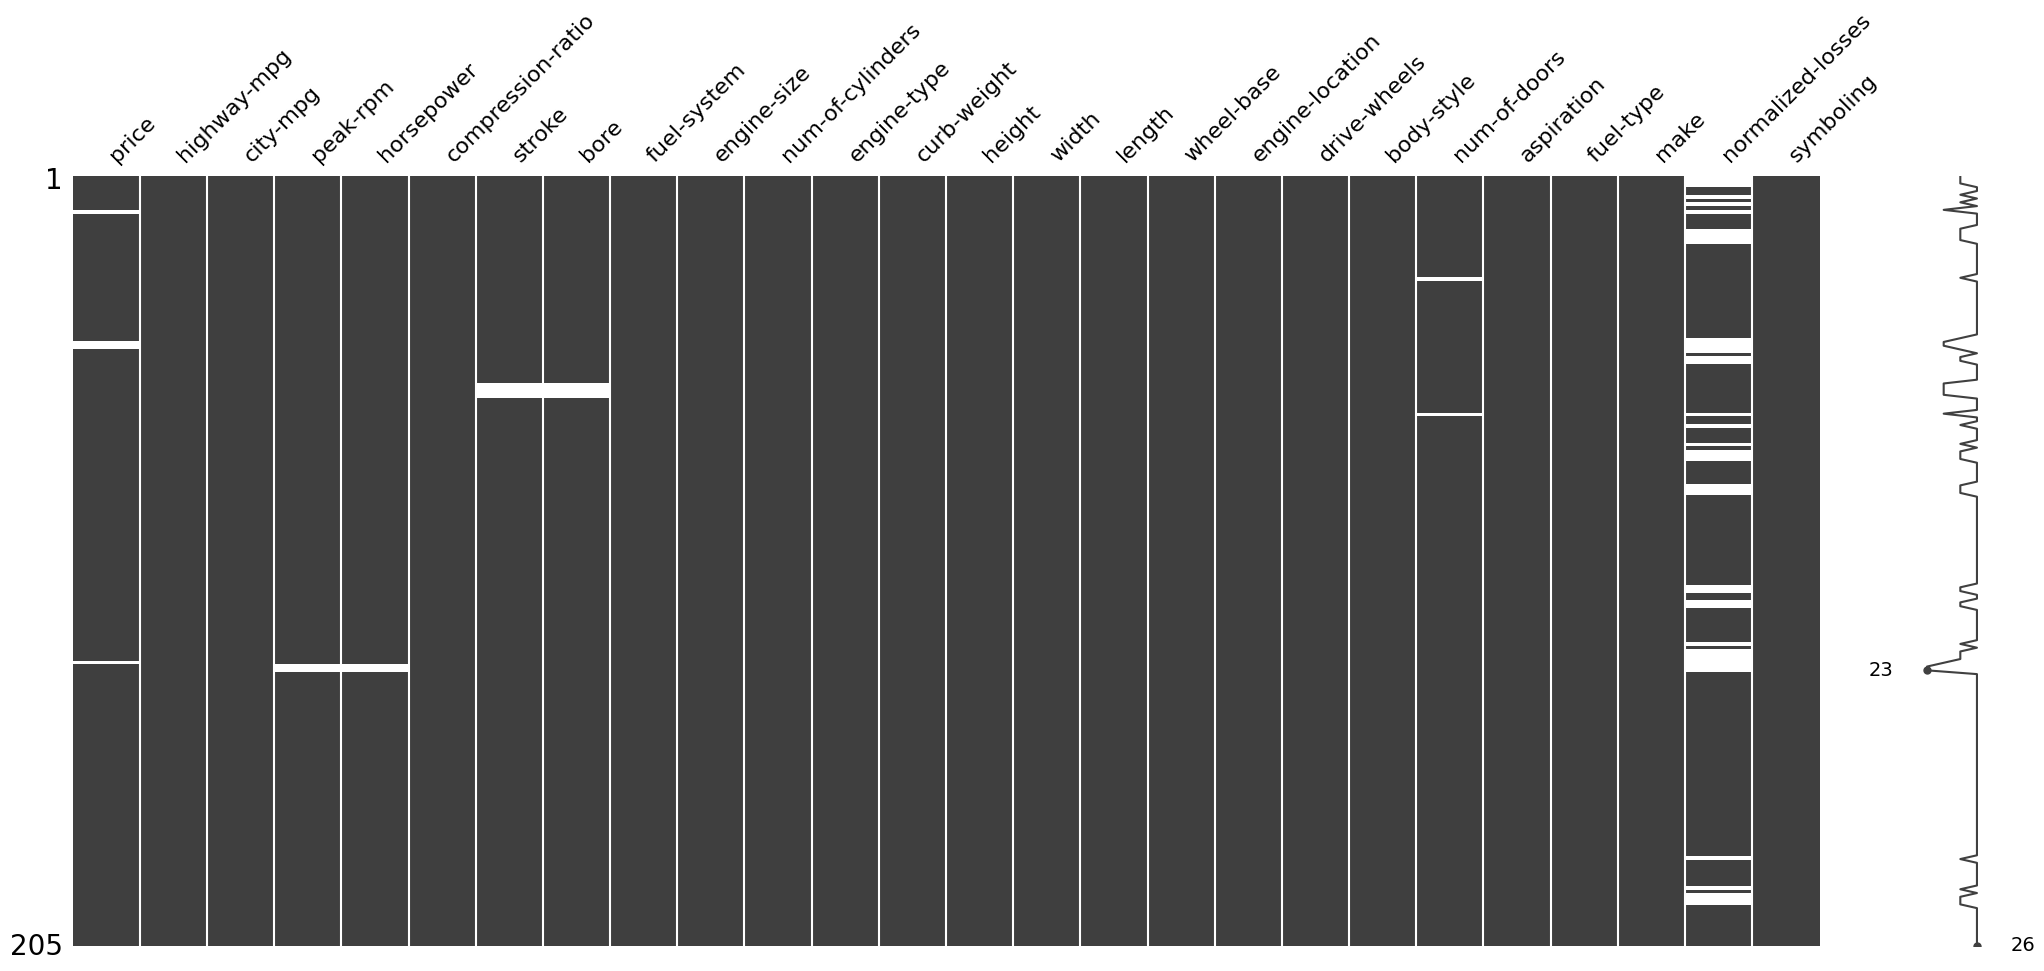

In [66]:
print('전체 Dataset의 Row 수 : {}\n'.format(dataset.shape[0]))
print('Normalized-losses 중 결측치가 있는 Row 수 : {}\n'.format(dataset['normalized-losses'].shape[0] - dataset['normalized-losses'].dropna().shape[0]))

# price 결측치가 있는 행을 제거
train_set = train_set.dropna(subset=['price'])
test_set = test_set.dropna(subset=['price'])

# 나머지 결측치 처리
for column in train_set.columns:
    # 데이터 타입을 확인
    dtype = train_set[column].dtype

    # Object, Int는 해당 column의 최빈값으로 대체
    if (dtype == 'object') | (dtype == 'int'):
        # train
        mode_train = train_set[column].mode()[0]
        train_set[column].fillna(mode_train, inplace=True)

        # test
        mode_test = test_set[column].mode()[0]
        test_set[column].fillna(mode_test, inplace=True)

    # Float은 해당 column의 평균값으로 대체
    else :
        # train
        mean_train = train_set[column].mean()
        train_set[column].fillna(mean_train, inplace=True)

        # test
        mean_test = test_set[column].mean()
        test_set[column].fillna(mean_test, inplace=True)

print('결측치 제거 후 Train data의 Row 수 : {}\n'.format(train_set.shape[0]))

train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)
msno.matrix(dataset)

## Categorical Feature Encoding

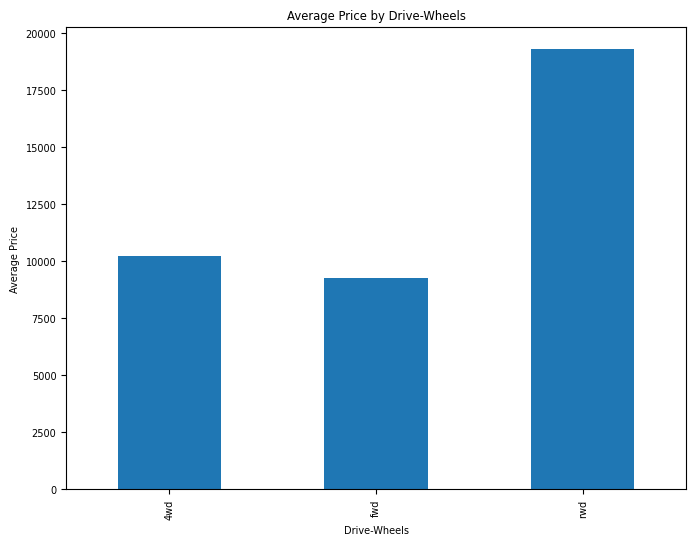

In [67]:
# drive-wheels
grouped_data = train_set.groupby('drive-wheels')['price'].mean()

plt.figure(figsize=(8, 6)) # 그래프 크기 설정
grouped_data.plot(kind='bar')
plt.title('Average Price by Drive-Wheels')
plt.xlabel('Drive-Wheels')
plt.ylabel('Average Price')
plt.show()

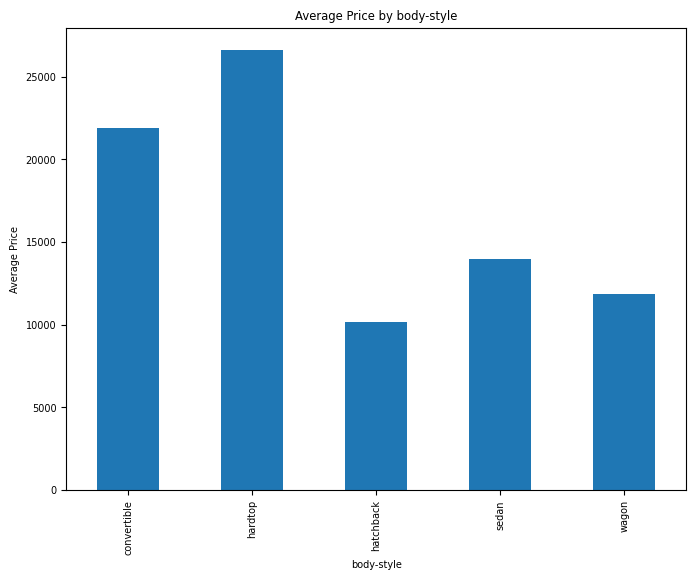

In [68]:
# body styles
grouped_data = train_set.groupby('body-style')['price'].mean()

plt.figure(figsize=(8, 6)) # 그래프 크기 설정
grouped_data.plot(kind='bar')
plt.title('Average Price by body-style')
plt.xlabel('body-style')
plt.ylabel('Average Price')
plt.show()

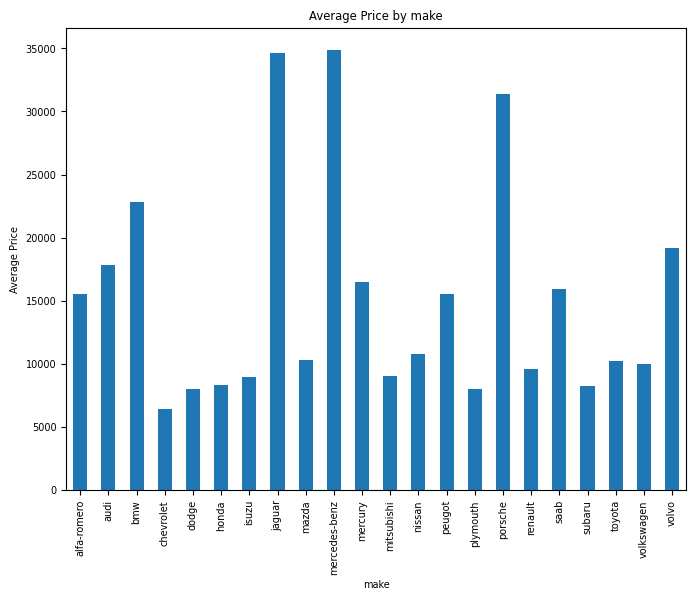

In [69]:
# Make
grouped_data = train_set.groupby('make')['price'].mean()

plt.figure(figsize=(8, 6)) # 그래프 크기 설정
grouped_data.plot(kind='bar')
plt.title('Average Price by make')
plt.xlabel('make')
plt.ylabel('Average Price')
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder

def label_encode_price_based(train_data, test_data, column):
    # 훈련 데이터의 평균 가격을 기준으로 레이블 매핑 생성
    mean_prices = train_data.groupby(column)['price'].mean()
    ranks = mean_prices.sort_values().index
    label_mapping = {k: v for v, k in enumerate(ranks)}

    # 훈련 데이터에 레이블 매핑 적용
    train_data[column] = train_data[column].map(label_mapping)

    # 테스트 데이터에 레이블 매핑 적용 (테스트 세트에 없는 범주는 NaN 처리)
    test_data[column] = test_data[column].map(lambda x: label_mapping.get(x, np.nan))

    return train_data, test_data

def encode_binary_column(train_data, test_data, column):
    # 훈련 데이터에 대한 Binary Encoding
    train_encoded = pd.get_dummies(train_data[column], prefix=column, drop_first=True)
    # 테스트 데이터에 대한 Binary Encoding
    test_encoded = pd.get_dummies(test_data[column], prefix=column, drop_first=True)
    test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)
    return train_encoded, test_encoded

# Target Encoding
specified_columns = ['body-style', 'make', 'drive-wheels']
for col in specified_columns:
    train_set, test_set = label_encode_price_based(train_set, test_set, col)

# 나머지 범주형 컬럼에 대한 인코딩
categorical_columns = train_set.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col not in specified_columns:
        if train_set[col].nunique() <= 3:
            # Label Encoding
            le = LabelEncoder()
            le.fit(train_set[col])
            train_set[col] = le.transform(train_set[col])
            test_set[col] = le.transform(test_set[col])
        else:
            # Binary Encoding
            train_encoded, test_encoded = encode_binary_column(train_set, test_set, col)
            # 원본 컬럼 제거 및 인코딩된 데이터 추가
            train_set = train_set.drop(col, axis=1)
            train_set = pd.concat([train_set, train_encoded], axis=1)
            test_set = test_set.drop(col, axis=1)
            test_set = pd.concat([test_set, test_encoded], axis=1)

train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

## DataScaling

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Y 에 대해서는 Scaling 적용이 일반적으로 불필요
train_set.iloc[:,1:] = scaler.fit_transform(train_set.iloc[:,1:])
test_set.iloc[:,1:] = scaler.transform(test_set.iloc[:,1:])



---

## Train / Valid



In [72]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 나머지 세트로 분할 (85% / 15%)
train, valid = train_test_split(train_set, test_size=0.15, stratify=train_set['body-style'], random_state=42)

test = test_set.copy()

print('Trainset의 SIZE : {}\n'.format(train.shape[0]))
print('Validset의 SIZE : {}\n'.format(valid.shape[0]))
print('Testset의 SIZE : {}\n'.format(test.shape[0]))

Trainset의 SIZE : 145

Validset의 SIZE : 26

Testset의 SIZE : 30





---


#EDA

## Histogram

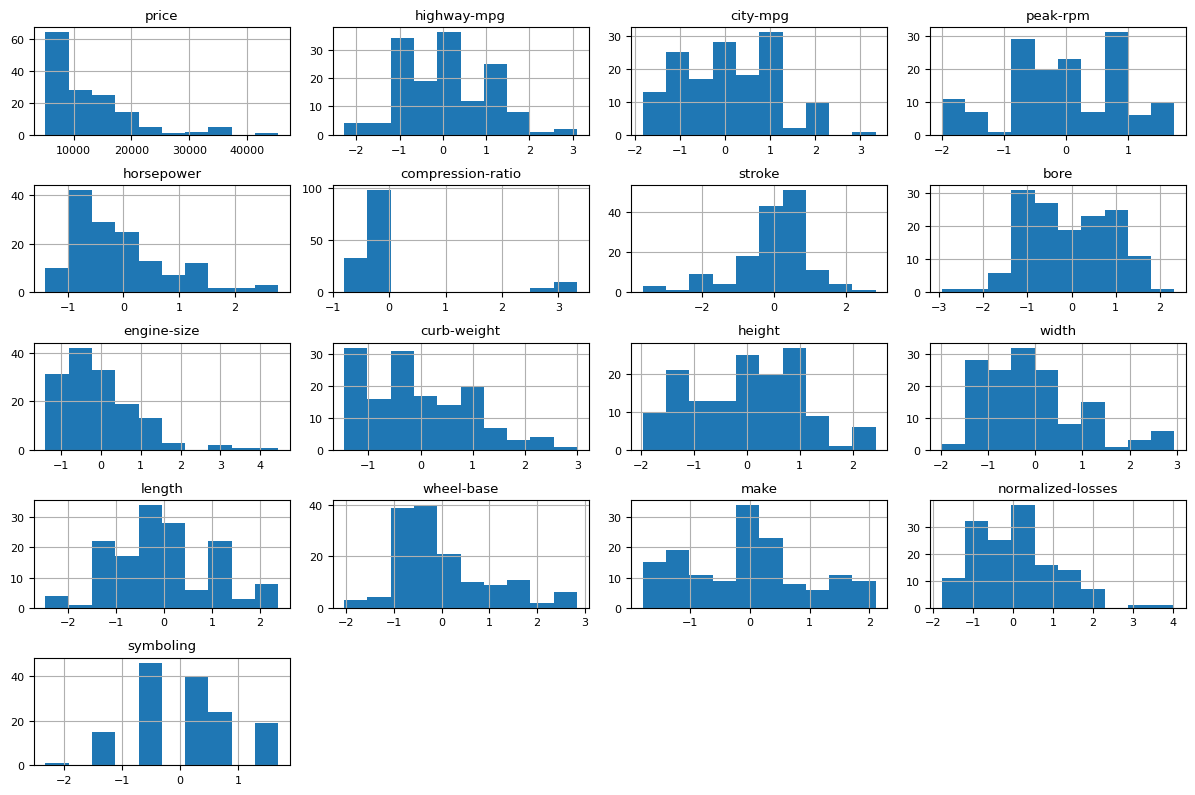

In [73]:
plt.rc('font', size=8)
# nunique가 6개 이상인 column만 선택
columns_to_plot = [col for col in train.columns if train[col].nunique() >= 6]
train[columns_to_plot].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

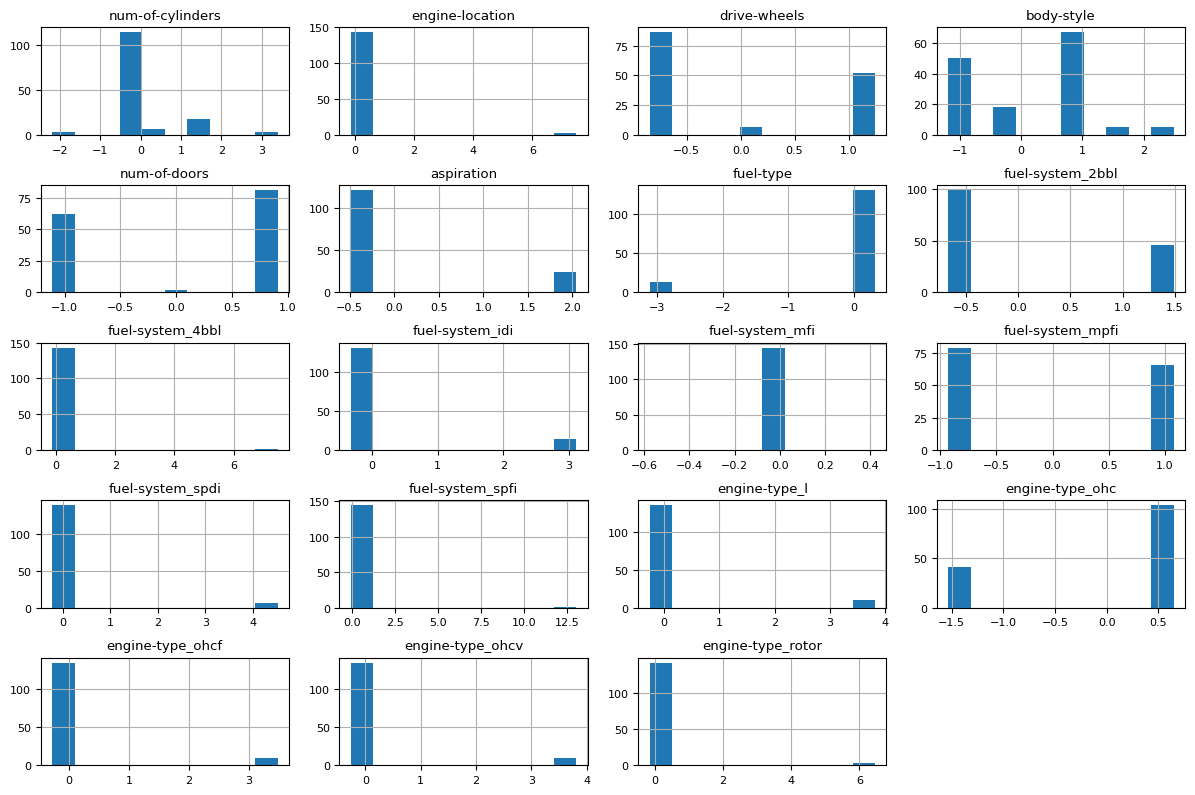

In [74]:
plt.rc('font', size=8)
# nunique가 6개 미만인 column만 선택
columns_to_plot = [col for col in train.columns if train[col].nunique() < 6]
train[columns_to_plot].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

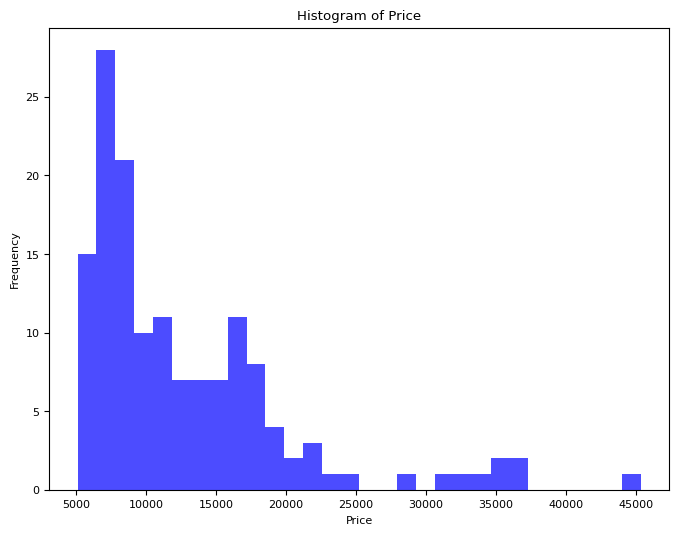

In [75]:
# 'price' 컬럼의 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(train['price'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Pie Chart

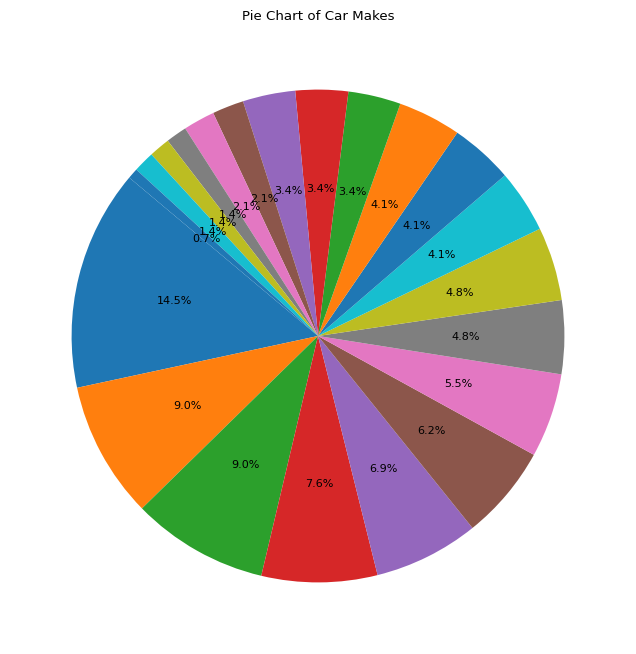

In [76]:
# 'make' 컬럼의 파이 차트
make_counts = train['make'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(make_counts, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Car Makes')
plt.show()

## BoxPlot

<Axes: >

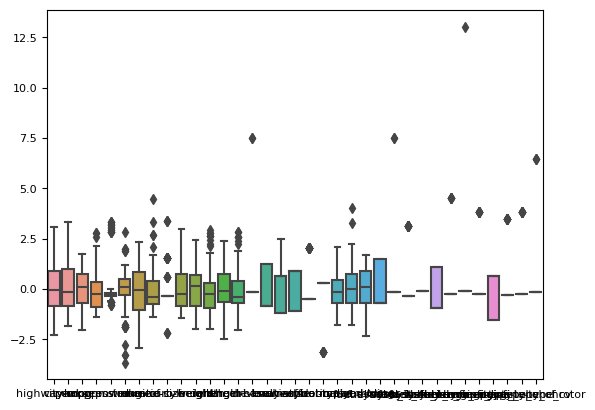

In [77]:
sns.boxplot(data = train.iloc[:,1:])

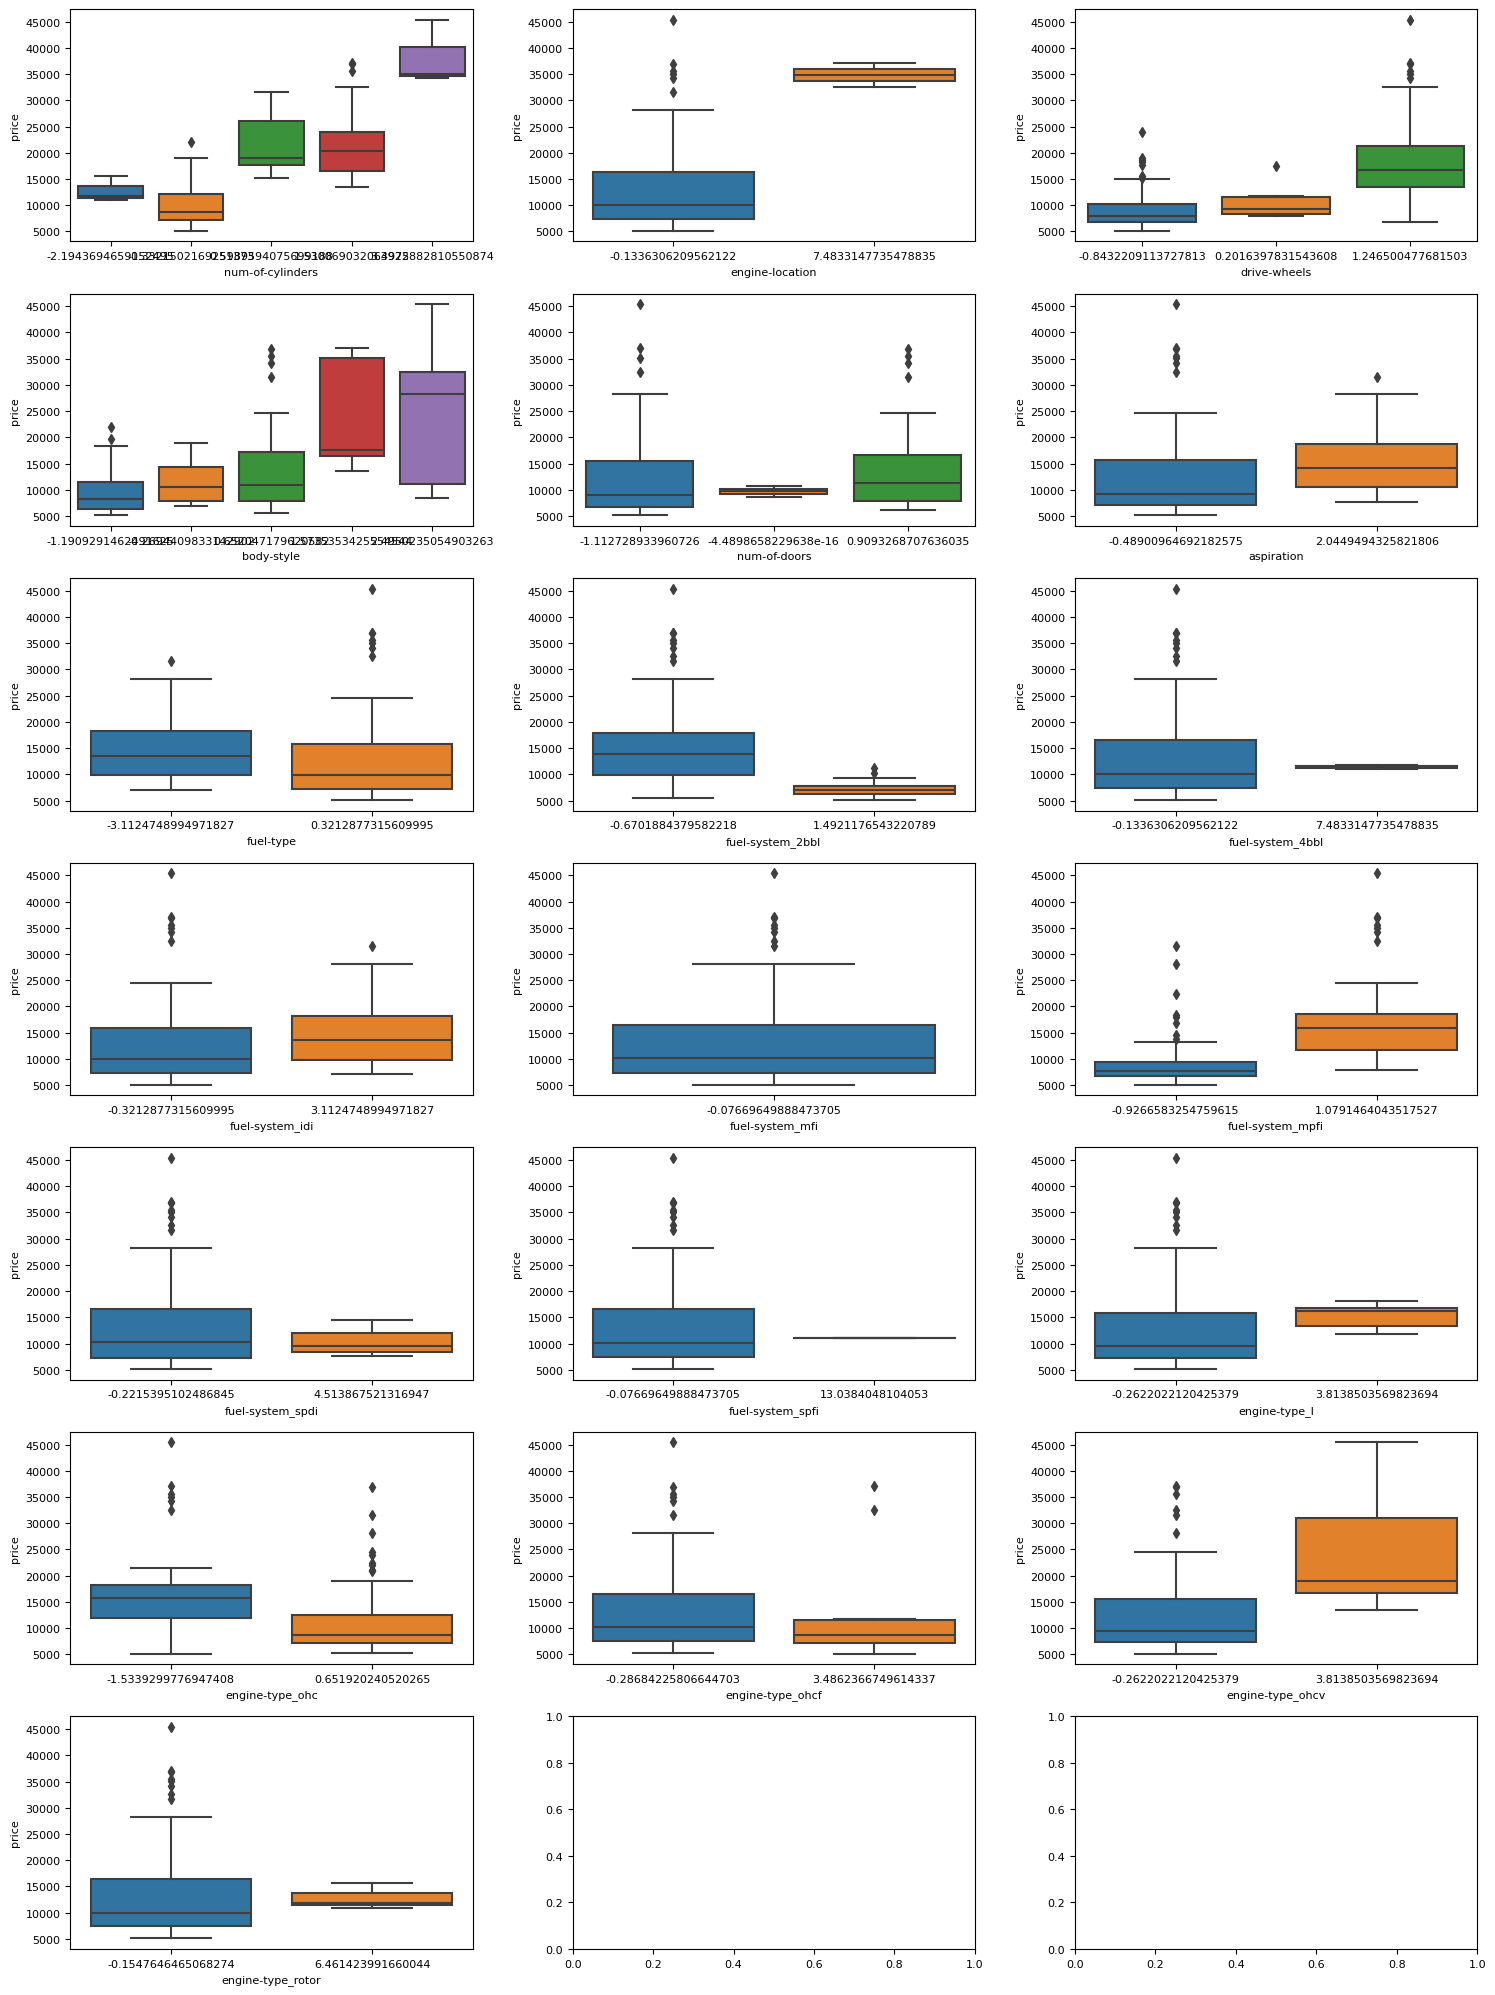

In [78]:
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
cat = [col for col in train.columns if train[col].nunique() < 6]

for i, f in enumerate(cat):
    row = i // 3  # Row index
    col = i % 3  # Column index
    sns.boxplot(x=f,y='price',data=train, ax=axes[row, col])

plt.tight_layout()

## Kernel Graph

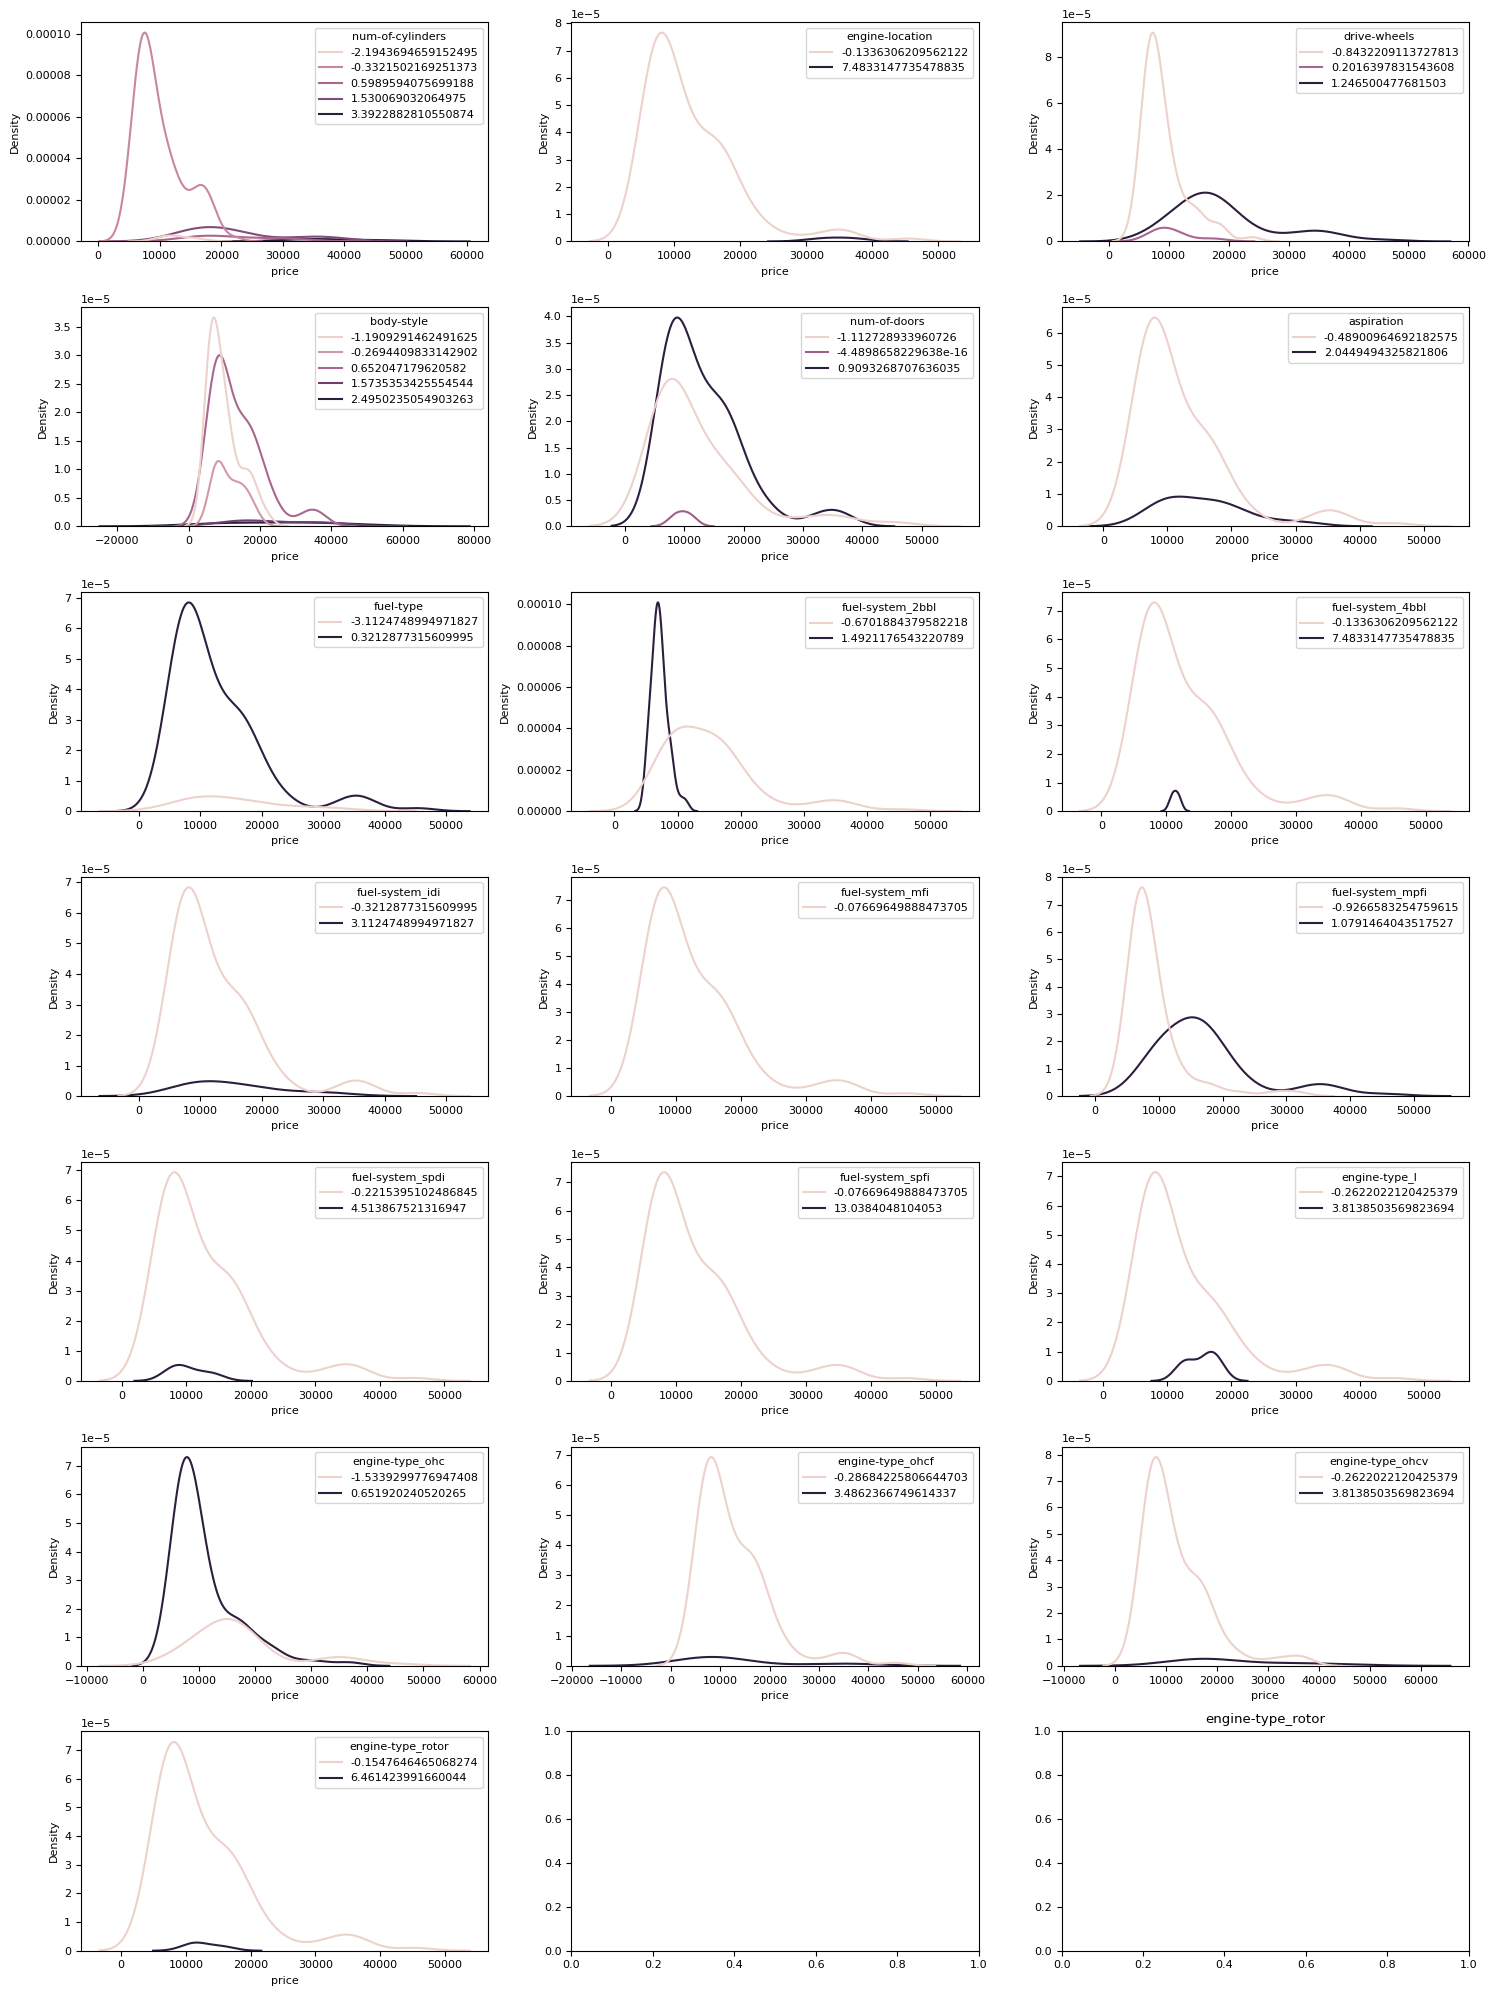

In [79]:
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

for i, f in enumerate(columns_to_plot):
    row = i // 3  # Row index
    col = i % 3  # Column index
    sns.kdeplot(x='price',data=train,hue=f, ax=axes[row, col])
    plt.title(f)
plt.tight_layout()
plt.show()

## HeatMap

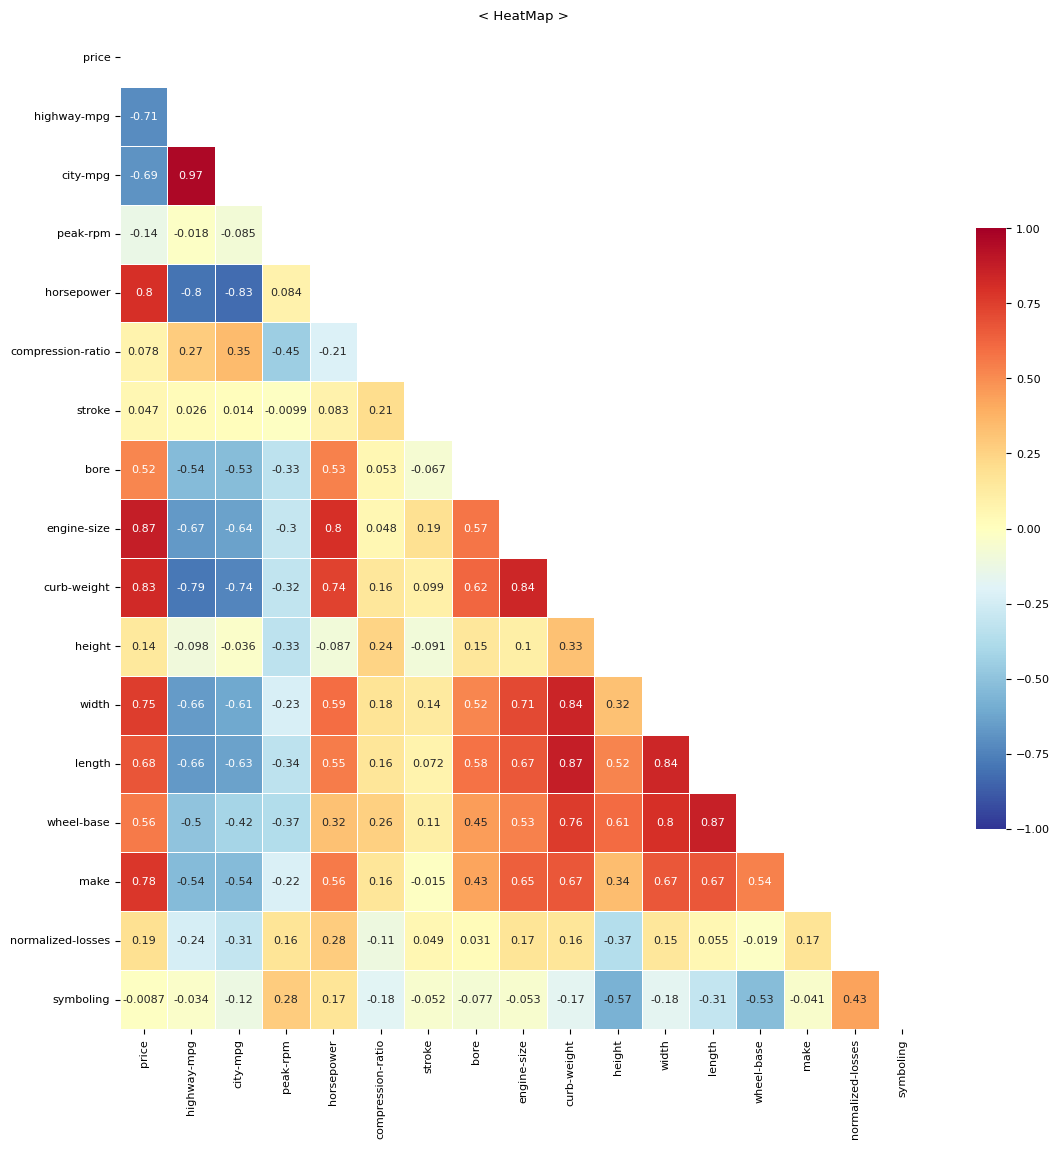

In [80]:
# 상관계수에 따른 HeatMap
#plt.rc('font', size=5)

non_cat = [col for col in train.columns if train[col].nunique() >= 6]

corr_df = train[non_cat].corr() # 상관계수
fig, ax = plt.subplots(figsize=(13,13))

mask = np.zeros_like(corr_df, dtype=np.bool) # 삼각형 마스크
mask[np.triu_indices_from(mask)] = True
plt.title('< HeatMap >')
sns.heatmap(corr_df, # 히트맵
            cmap = 'RdYlBu_r',
            annot = True,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            vmin = -1.0, vmax = 1.0)
plt.show()

##PairPlot

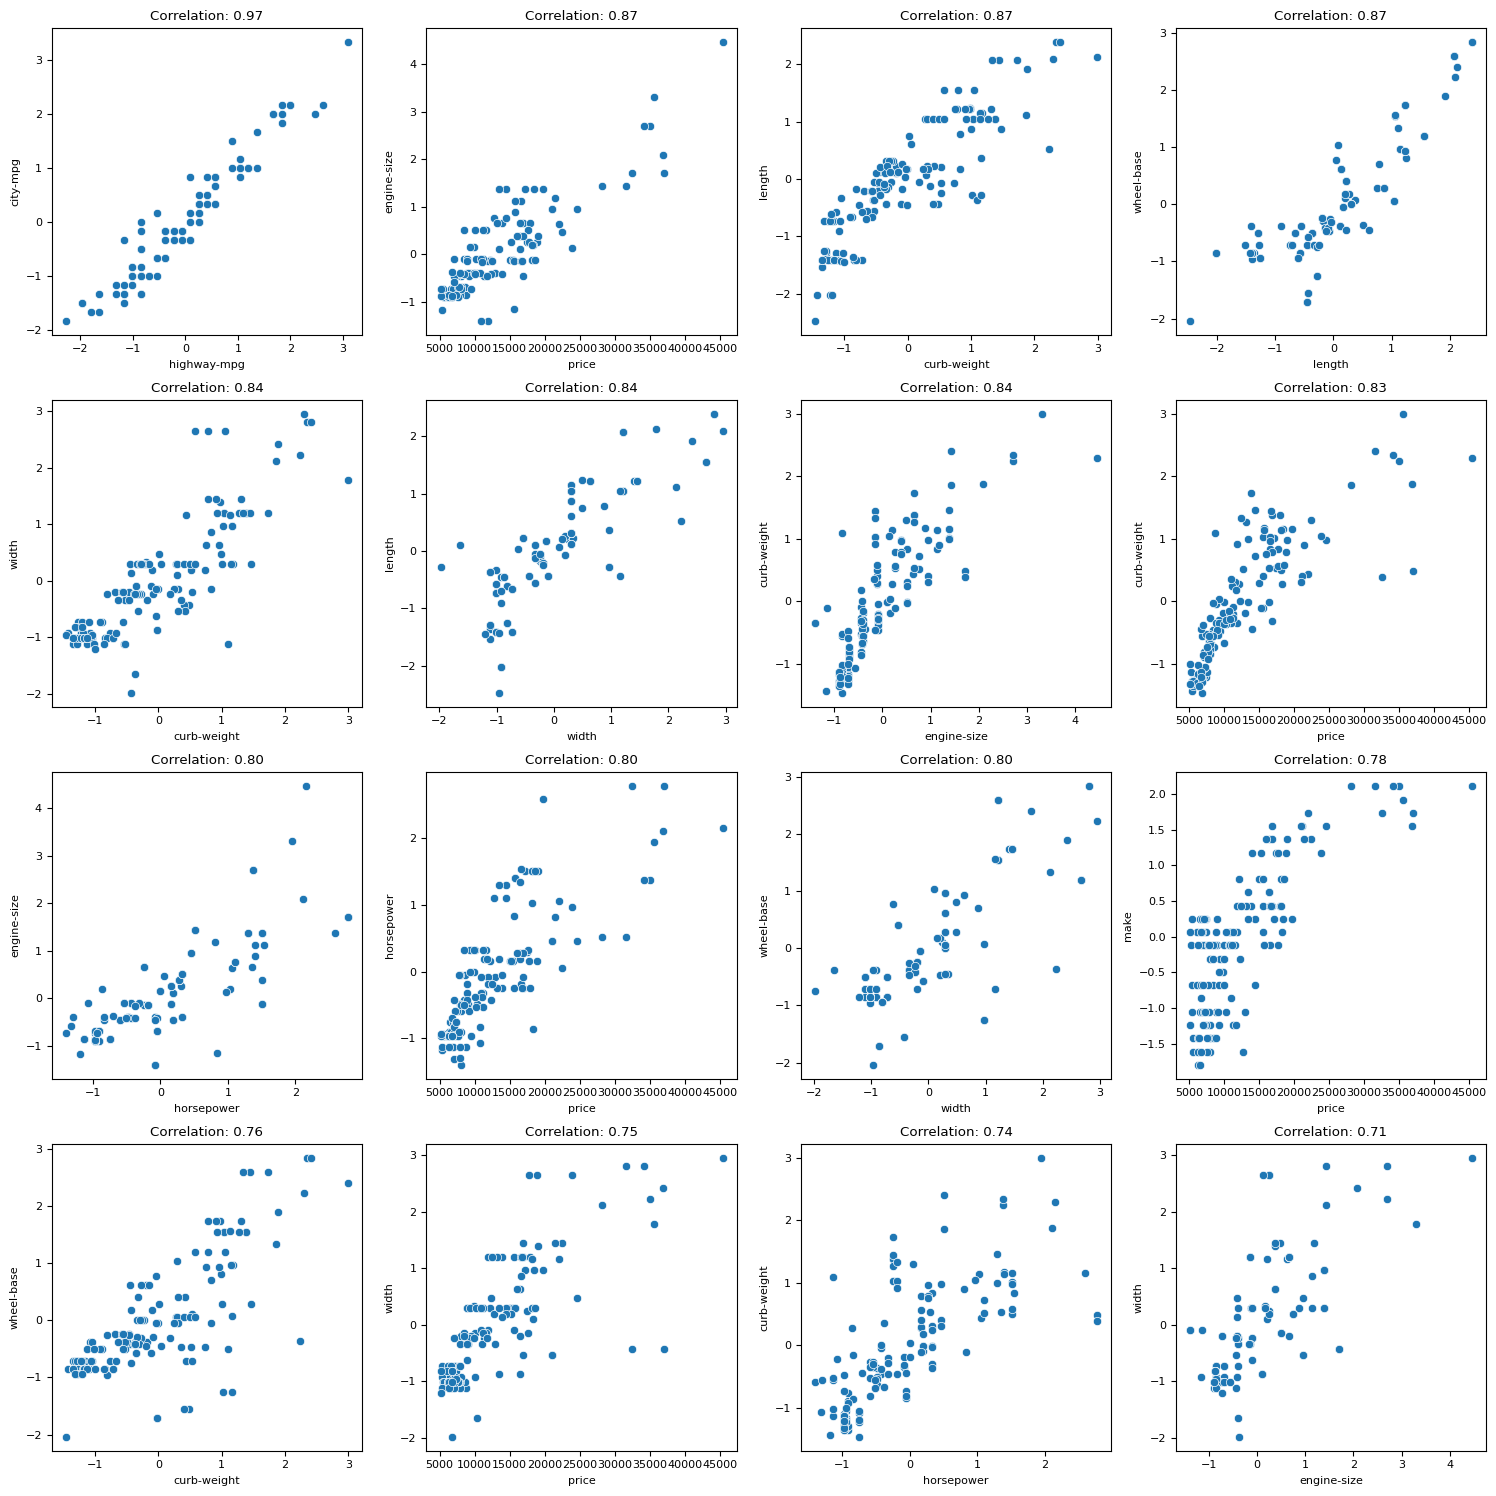

In [81]:
corr_matrix = train[non_cat].corr()

top_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                .stack()
                .sort_values(ascending=False))
top_corr = top_corr.head(16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, (columns, corr_value) in enumerate(top_corr.items()):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=train[columns[0]], y=train[columns[1]], ax=ax)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title(f'Correlation: {corr_value:.2f}')

plt.tight_layout()
plt.show()

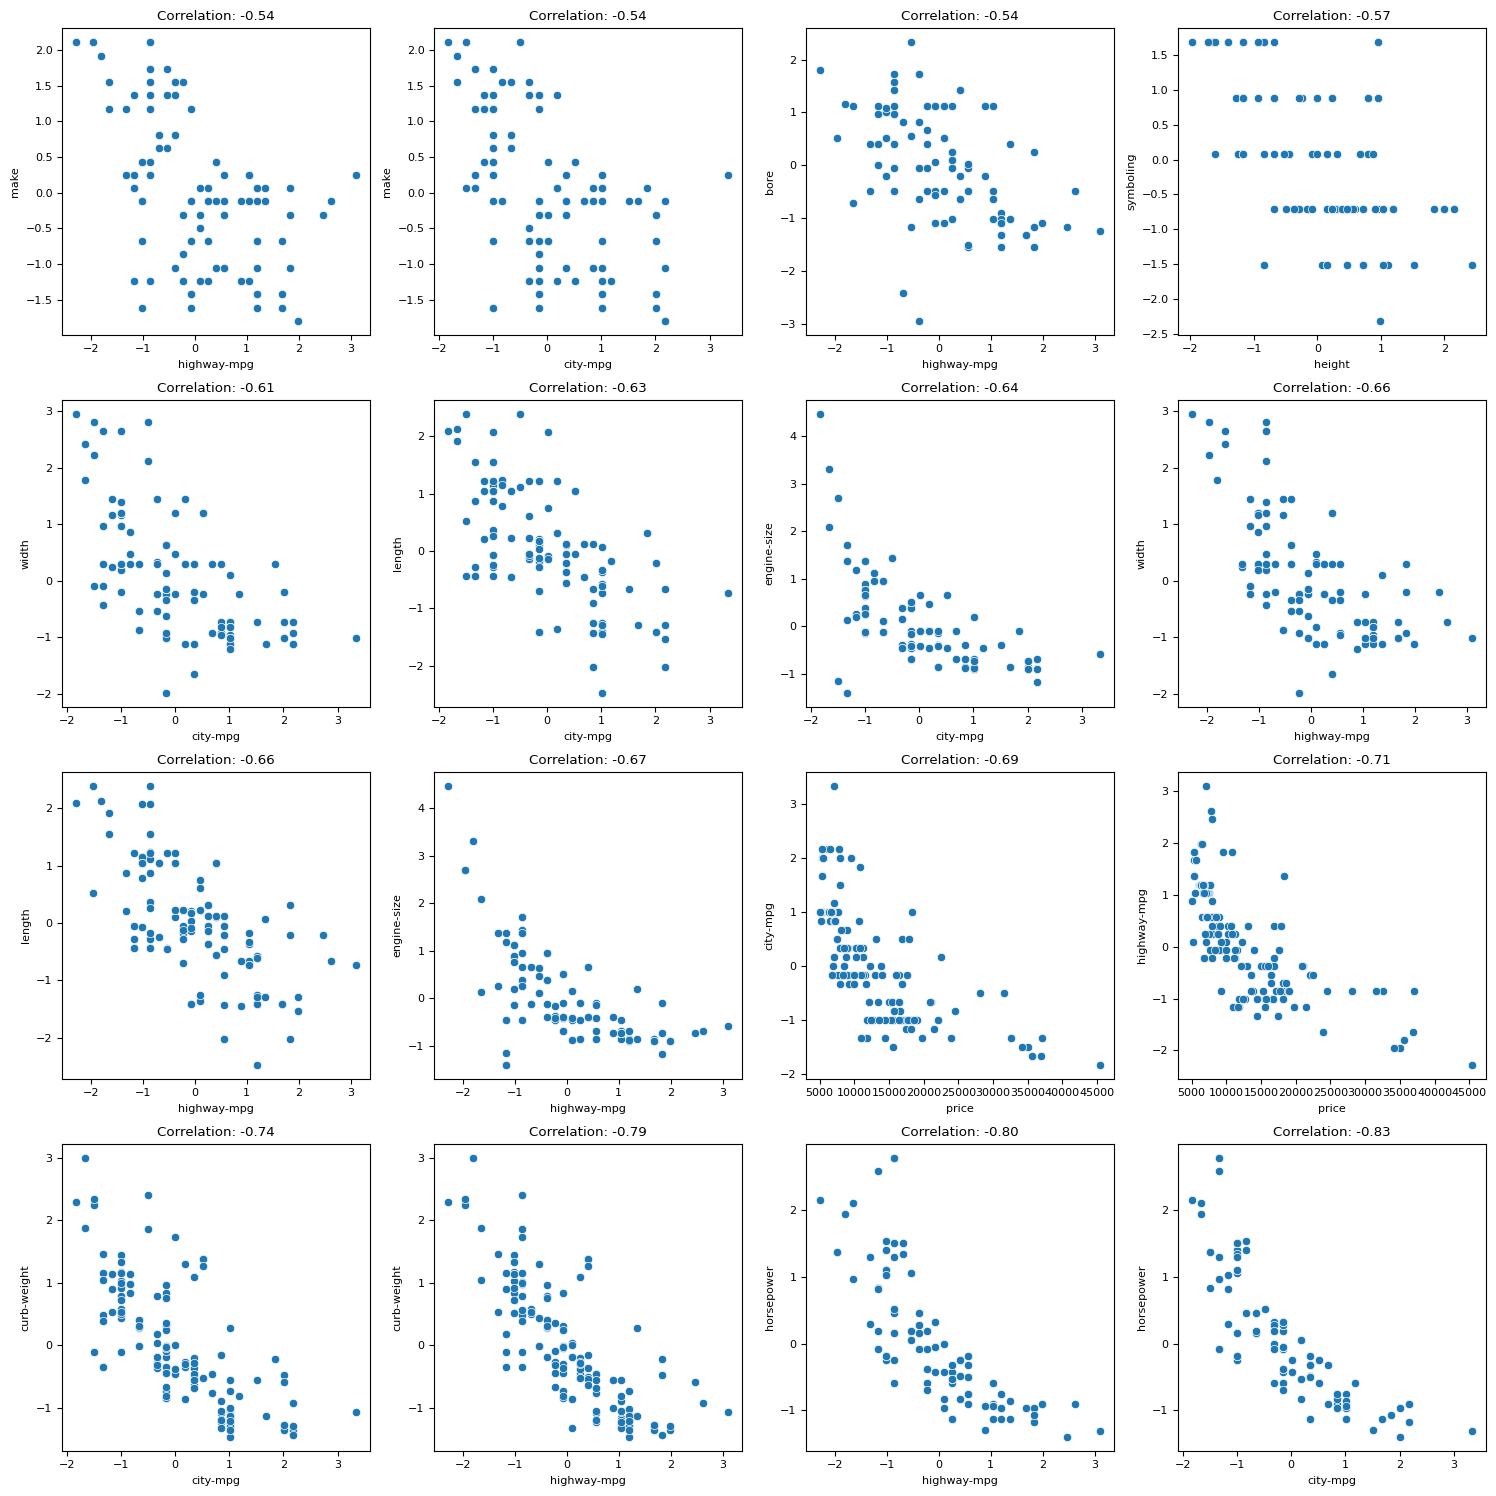

In [82]:
corr_matrix = train[non_cat].corr()

bot_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                .stack()
                .sort_values(ascending=False))
bot_corr = bot_corr.tail(16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, (columns, corr_value) in enumerate(bot_corr.items()):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=train[columns[0]], y=train[columns[1]], ax=ax)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title(f'Correlation: {corr_value:.2f}')

plt.tight_layout()
plt.show()

## Regplot

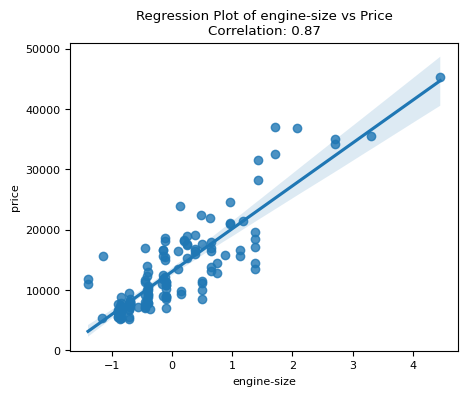

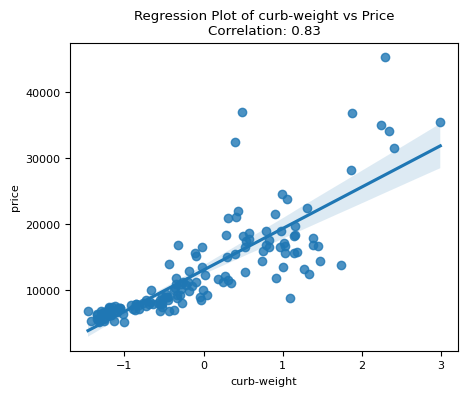

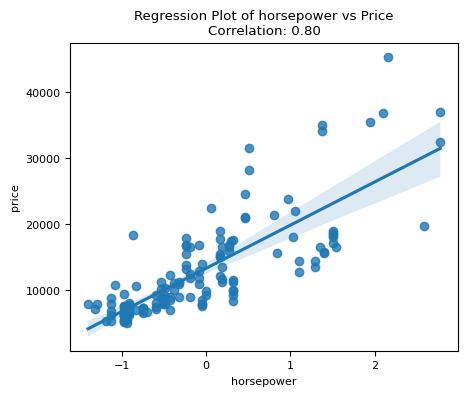

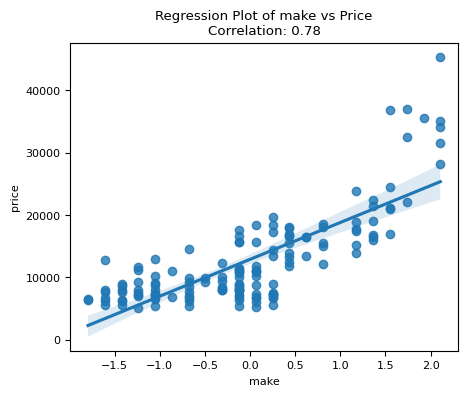

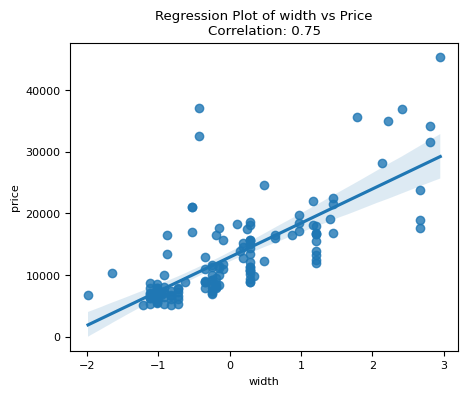

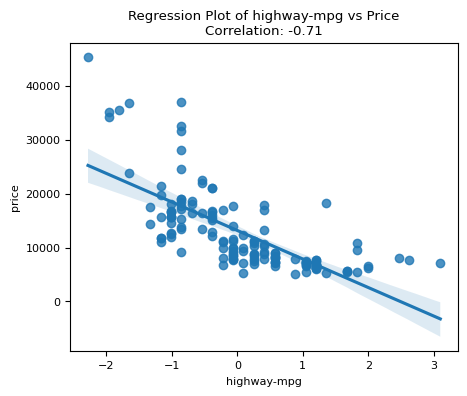

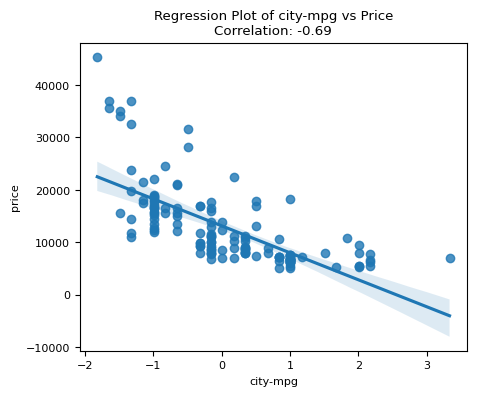

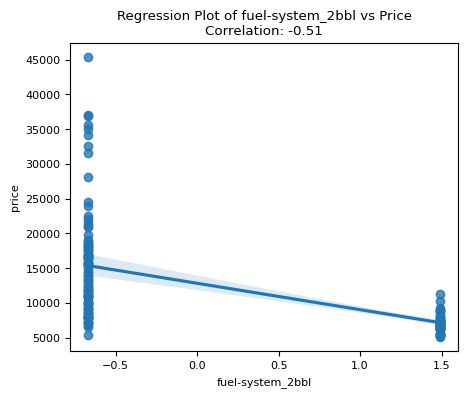

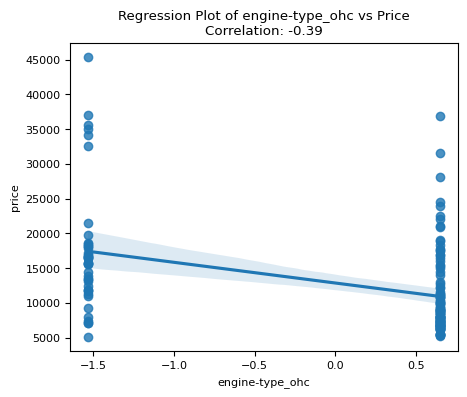

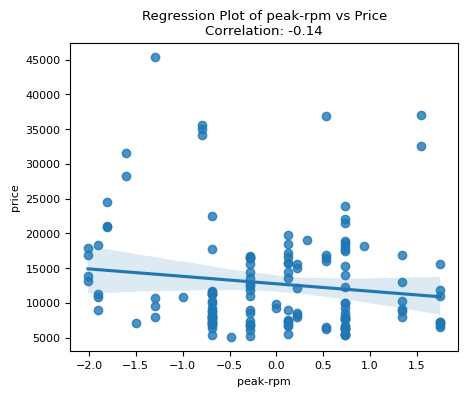

In [83]:
# 'price' 열과 다른 열들 사이의 상관계수 계산
correlations = train.corr()['price'].sort_values()

# 상관계수가 가장 높은 top 5와 가장 낮은 bottom 5 선택
top_5 = correlations.nlargest(6).index[1:]  # 상위 6개 중 'price' 제외
bottom_5 = correlations.nsmallest(5).index

# 상위 5개 시각화
for col in top_5:
    plt.figure(figsize=(5, 4))
    sns.regplot(x=train[col], y=train['price'])
    plt.title(f'Regression Plot of {col} vs Price\nCorrelation: {correlations[col]:.2f}')
    plt.show()

# 하위 5개 시각화
for col in bottom_5:
    plt.figure(figsize=(5, 4))
    sns.regplot(x=train[col], y=train['price'])
    plt.title(f'Regression Plot of {col} vs Price\nCorrelation: {correlations[col]:.2f}')
    plt.show()



---



# Model



## Linear Regression

In [84]:
import statsmodels.api as sm

# 'price'를 제외한 모든 컬럼을 특성으로 사용
X_train = train.drop('price', axis=1)
y_train = train['price']

# statsmodels를 사용하여 선형 회귀 모델 구축
X_train_sm = sm.add_constant(X_train)  # 상수항 추가
model = sm.OLS(y_train, X_train_sm).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     58.78
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           3.75e-56
Time:                        04:15:33   Log-Likelihood:                -1287.8
No. Observations:                 145   AIC:                             2644.
Df Residuals:                     111   BIC:                             2745.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
highway-mpg         911.5449    887.63

In [92]:
y_pred = model.predict(X_train_sm)

# Y의 평균
y_mean = np.mean(y_train)

# SST
SST = np.sum((y_train - y_mean)**2)

# SSR
SSR = np.sum((y_pred - y_mean)**2)

# SSE
SSE = np.sum((y_train - y_pred)**2)

print("SST (Total Sum of Squares):", SST)
print("SSR (Sum of Squares for Regression):", SSR)
print("SSE (Sum of Squares for Error):", SSE)

SST (Total Sum of Squares): 8119515376.993105
SSR (Sum of Squares for Regression): 7680028540.819061
SSE (Sum of Squares for Error): 439486836.1740343


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF 계산을 위해 데이터프레임 준비
X_train_vif = X_train_sm.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns

# VIF 계산
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(len(X_train_vif.columns))]

print(vif_data)

              feature         VIF
0         highway-mpg   29.405579
1            city-mpg   34.564712
2            peak-rpm    4.295571
3          horsepower   27.274941
4   compression-ratio  166.092326
5              stroke    3.004843
6                bore    6.677763
7         engine-size   39.182130
8    num-of-cylinders   15.712932
9         curb-weight   22.068931
10             height    4.188111
11              width    8.401272
12             length   14.884790
13         wheel-base   14.180576
14    engine-location    4.451165
15       drive-wheels    4.992692
16         body-style    2.188335
17       num-of-doors    3.085700
18         aspiration    4.985818
19          fuel-type         inf
20               make    5.129714
21  normalized-losses    2.565476
22          symboling    3.963956
23   fuel-system_2bbl    7.289595
24   fuel-system_4bbl    3.630265
25    fuel-system_idi         inf
26    fuel-system_mfi    1.039250
27   fuel-system_mpfi   10.500440
28   fuel-syst

In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Train dataset에 대한 성능 평가
X_train = train.drop('price', axis=1)
y_train = train['price']
X_train_sm = sm.add_constant(X_train)  # 첫 번째 위치에 'const' 열을 추가하고 모든 값에 1 할당

# 예측 및 성능 평가 (traination)
y_pred_train = model.predict(X_train_sm)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)


print("\nTrain MAE:", mae_train)
print("Train MSE:", mse_train)



Train MAE: 1288.160456565701
Train MSE: 3030943.6977519607


In [98]:
# Valid dataset에 대한 성능 평가
X_valid = valid.drop('price', axis=1)
y_valid = valid['price']
X_valid_sm = sm.add_constant(X_valid)  # 첫 번째 위치에 'const' 열을 추가하고 모든 값에 1 할당

# 예측 및 성능 평가 (Validation)
y_pred_valid = model.predict(X_valid_sm)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)


print("\nValidation MAE:", mae_valid)
print("Validation MSE:", mse_valid)


Validation MAE: 88175.34313939008
Validation MSE: 194347621114.30695


In [99]:
# Test dataset에 대한 성능 평가
X_test = test.drop('price', axis=1)
y_test = test['price']
X_test_sm = sm.add_constant(X_test)

# 예측 및 성능 평가 (Test)
y_pred_test = model.predict(X_test_sm)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("\nTest MAE:", mae_test)
print("Test MSE:", mse_test)


Test MAE: 2241.533548130706
Test MSE: 11302172.952446725


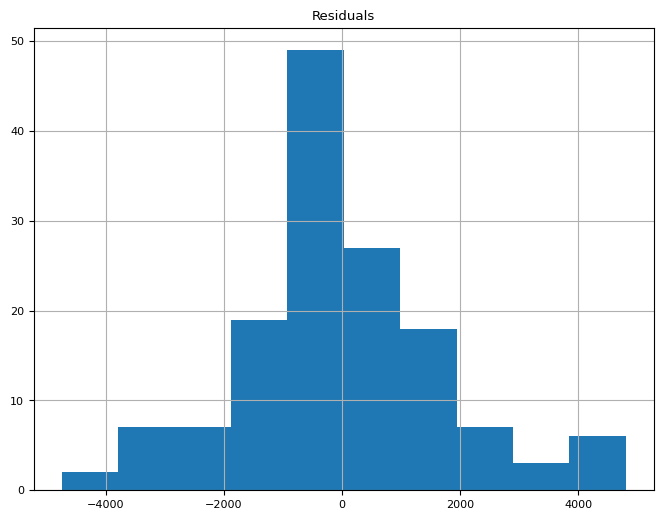

In [86]:
# 잔차 계산
residuals = model.resid

# 잔차 플롯
plt.figure(figsize=(8, 6))
residuals.hist()
plt.title('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

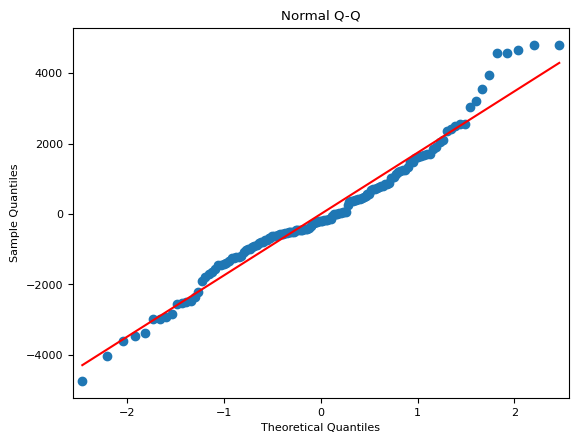

In [101]:
# Q-Q Plot (정규성 검정)
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q')
plt.show()


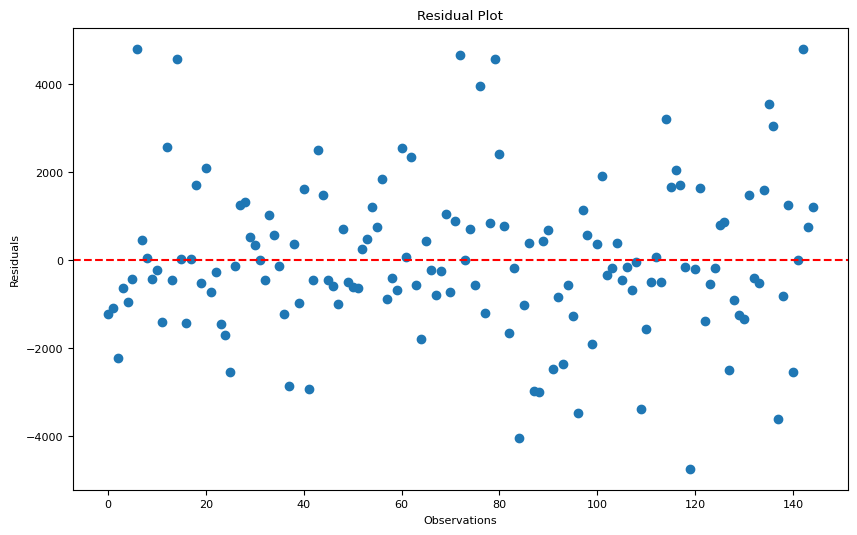

In [108]:
|#잔차 플롯 (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(x=np.arange(len(residuals)), y=residuals)
plt.title('Residual Plot')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

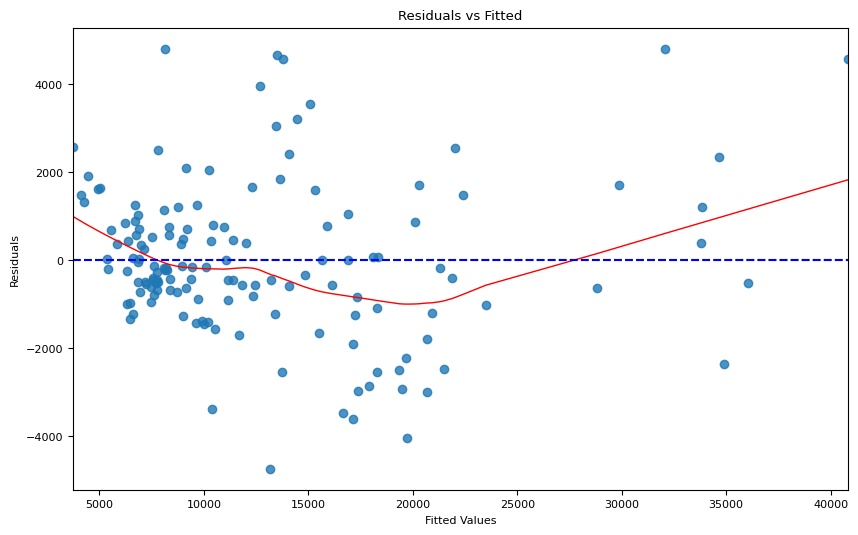

In [109]:
# 잔차 vs 예측값 플롯 (Residuals vs Fitted)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

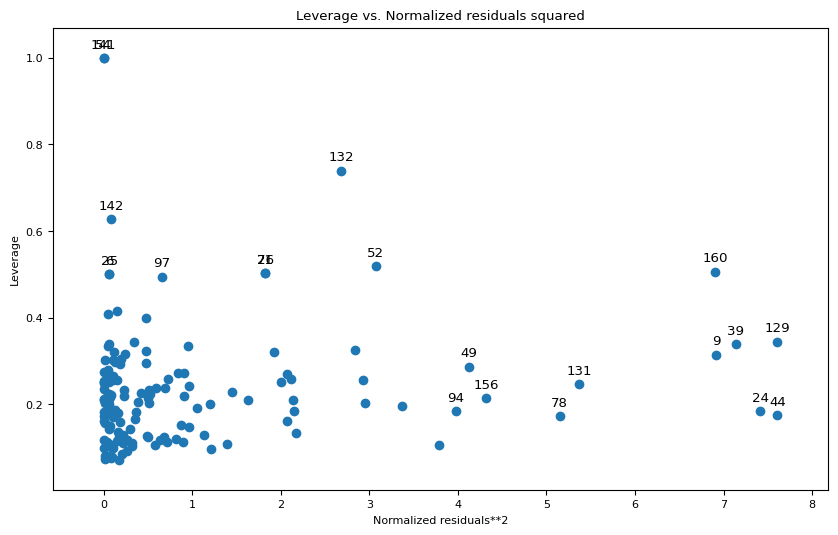

In [125]:
# Leverage Plot (레버리지 효과 확인)
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10, 6))
fig = plot_leverage_resid2(model, ax=ax)
plt.show()

In [143]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 학습 및 평가 함수
def train_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    return mae, mse

# 모델 초기화
par_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in par_list :
  lasso = Lasso(alpha=i)
  v_mae_lasso, v_mse_lasso = train_and_evaluate(lasso, X_train, y_train, X_valid, y_valid)
  print("Validation Lasso MAE:", v_mae_lasso)
  print("Validation Lasso MSE:", v_mse_lasso)
  print()

Validation Lasso MAE: 1804.2875477796395
Validation Lasso MSE: 6861380.695034706

Validation Lasso MAE: 1802.9825471361205
Validation Lasso MSE: 6901904.103263831

Validation Lasso MAE: 1801.7696420125276
Validation Lasso MSE: 6934622.698472286

Validation Lasso MAE: 1800.6554882129976
Validation Lasso MSE: 6966082.655489814

Validation Lasso MAE: 1799.557711862874
Validation Lasso MSE: 6997619.75389364



In [145]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 학습 및 평가 함수
def train_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    return mae, mse

# 모델 초기화
par_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in par_list :
  ridge = Ridge(alpha=i)
  v_mae_ridge, v_mse_ridge = train_and_evaluate(ridge, X_train, y_train, X_valid, y_valid)
  print("Validation Ridge MAE:", v_mae_ridge)
  print("Validation Ridge MSE:", v_mse_ridge)
  print()

Validation Ridge MAE: 1801.508582711757
Validation Ridge MSE: 7030569.097967951

Validation Ridge MAE: 1797.5841215932383
Validation Ridge MSE: 7283842.326276458

Validation Ridge MAE: 1793.721394978847
Validation Ridge MSE: 7454300.687541854

Validation Ridge MAE: 1788.1640976671854
Validation Ridge MSE: 7572177.244640935

Validation Ridge MAE: 1781.3840764604079
Validation Ridge MSE: 7653769.3750375565



In [146]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 학습 및 평가 함수
def train_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    return mae, mse

# 모델 초기화
par_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in par_list :
  elasticnet = ElasticNet(alpha=i, l1_ratio=0.5)
  v_mae_elasticnet, v_mse_elasticnet = train_and_evaluate(elasticnet, X_train, y_train, X_valid, y_valid)
  print("Validation ElasticNet MAE:", v_mae_elasticnet)
  print("Validation ElasticNet MSE:", v_mse_elasticnet)
  print()

Validation ElasticNet MAE: 1584.0613621545554
Validation ElasticNet MSE: 6744223.272682095

Validation ElasticNet MAE: 1485.8194089004405
Validation ElasticNet MSE: 4817473.3755279435

Validation ElasticNet MAE: 1485.6324867094686
Validation ElasticNet MSE: 4041267.6616082336

Validation ElasticNet MAE: 1497.2018129000342
Validation ElasticNet MSE: 3713032.232474392

Validation ElasticNet MAE: 1506.3462103884149
Validation ElasticNet MSE: 3610327.5271135187



In [148]:
for i in par_list :
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=i)
  v_mae_elasticnet, v_mse_elasticnet = train_and_evaluate(elasticnet, X_train, y_train, X_valid, y_valid)
  print("Validation ElasticNet MAE:", v_mae_elasticnet)
  print("Validation ElasticNet MSE:", v_mse_elasticnet)
  print()

Validation ElasticNet MAE: 1506.4661066639476
Validation ElasticNet MSE: 3611024.805429732

Validation ElasticNet MAE: 1497.253792599423
Validation ElasticNet MSE: 3713736.8276074794

Validation ElasticNet MAE: 1485.6324867094686
Validation ElasticNet MSE: 4041267.6616082336

Validation ElasticNet MAE: 1485.817816721075
Validation ElasticNet MSE: 4816444.998486922

Validation ElasticNet MAE: 1582.629467921711
Validation ElasticNet MSE: 6742096.187631665



In [150]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 학습 및 평가 함수
def train_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    return mae, mse

# Lasso, Ridge, ElasticNet 모델 초기화
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# 모델 학습 및 평가(Train)
T_mae_lasso, T_mse_lasso = train_and_evaluate(lasso, X_train, y_train, X_train, y_train)
T_mae_ridge, T_mse_ridge = train_and_evaluate(ridge, X_train, y_train, X_train, y_train)
T_mae_elasticnet, T_mse_elasticnet = train_and_evaluate(elasticnet, X_train, y_train, X_train, y_train)

# 모델 학습 및 평가(Validation)
v_mae_lasso, v_mse_lasso = train_and_evaluate(lasso, X_train, y_train, X_valid, y_valid)
v_mae_ridge, v_mse_ridge = train_and_evaluate(ridge, X_train, y_train, X_valid, y_valid)
v_mae_elasticnet, v_mse_elasticnet = train_and_evaluate(elasticnet, X_train, y_train, X_valid, y_valid)

# 모델 학습 및 평가(Test)
t_mae_lasso, t_mse_lasso = train_and_evaluate(lasso, X_train, y_train, X_test, y_test)
t_mae_ridge, t_mse_ridge = train_and_evaluate(ridge, X_train, y_train, X_test, y_test)
t_mae_elasticnet, t_mse_elasticnet = train_and_evaluate(elasticnet, X_train, y_train, X_test, y_test)

# 결과 출력
print("Train Lasso MAE:", T_mae_lasso)
print("Train Lasso MSE:", T_mse_lasso)
print()
print("Train Ridge MAE:", T_mae_ridge)
print("Train Ridge MSE:", T_mse_ridge)
print()
print("Train ElasticNet MAE:", T_mae_elasticnet)
print("Train ElasticNet MSE:", T_mse_elasticnet)

# 결과 출력
print('')
print("Validation Lasso MAE:", v_mae_lasso)
print("Validation Lasso MSE:", v_mse_lasso)
print()
print("Validation Ridge MAE:", v_mae_ridge)
print("Validation Ridge MSE:", v_mse_ridge)
print()
print("Validation ElasticNet MAE:", v_mae_elasticnet)
print("Validation ElasticNet MSE:", v_mse_elasticnet)

# 결과 출력
print('')
print("Test Lasso MAE:", t_mae_lasso)
print("Test Lasso MSE:", t_mse_lasso)
print()
print("Test Ridge MAE:", t_mae_ridge)
print("Test Ridge MSE:", t_mse_ridge)
print()
print("Test ElasticNet MAE:", t_mae_elasticnet)
print("Test ElasticNet MSE:", t_mse_elasticnet)

Train Lasso MAE: 1288.1095494697136
Train Lasso MSE: 3030948.80026979

Train Ridge MAE: 1285.0781556511124
Train Ridge MSE: 3085448.2055836166

Train ElasticNet MAE: 1371.953559213889
Train ElasticNet MSE: 3536781.5197166796

Validation Lasso MAE: 1804.2875477796395
Validation Lasso MSE: 6861380.695034706

Validation Ridge MAE: 1777.6399024483796
Validation Ridge MSE: 7684179.005693727

Validation ElasticNet MAE: 1584.0613621545554
Validation ElasticNet MSE: 6744223.272682095

Test Lasso MAE: 2241.538834691159
Test Lasso MSE: 11303227.333298447

Test Ridge MAE: 2243.8992441872356
Test Ridge MSE: 11939977.39414078

Test ElasticNet MAE: 2439.94939651096
Test ElasticNet MSE: 13605279.795048226


## Logistic Regression

In [91]:
Validation MAE: 88175.34313939008
Validation MSE: 194347621114.30695